In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [62]:
df.shape

(13200, 11)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [66]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [68]:
df.duplicated().sum()

0

In [70]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [72]:
cols = ['Cloud Cover', 'Season', 'Location']

for col in cols:
    print(df[col].value_counts())

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64


In [74]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


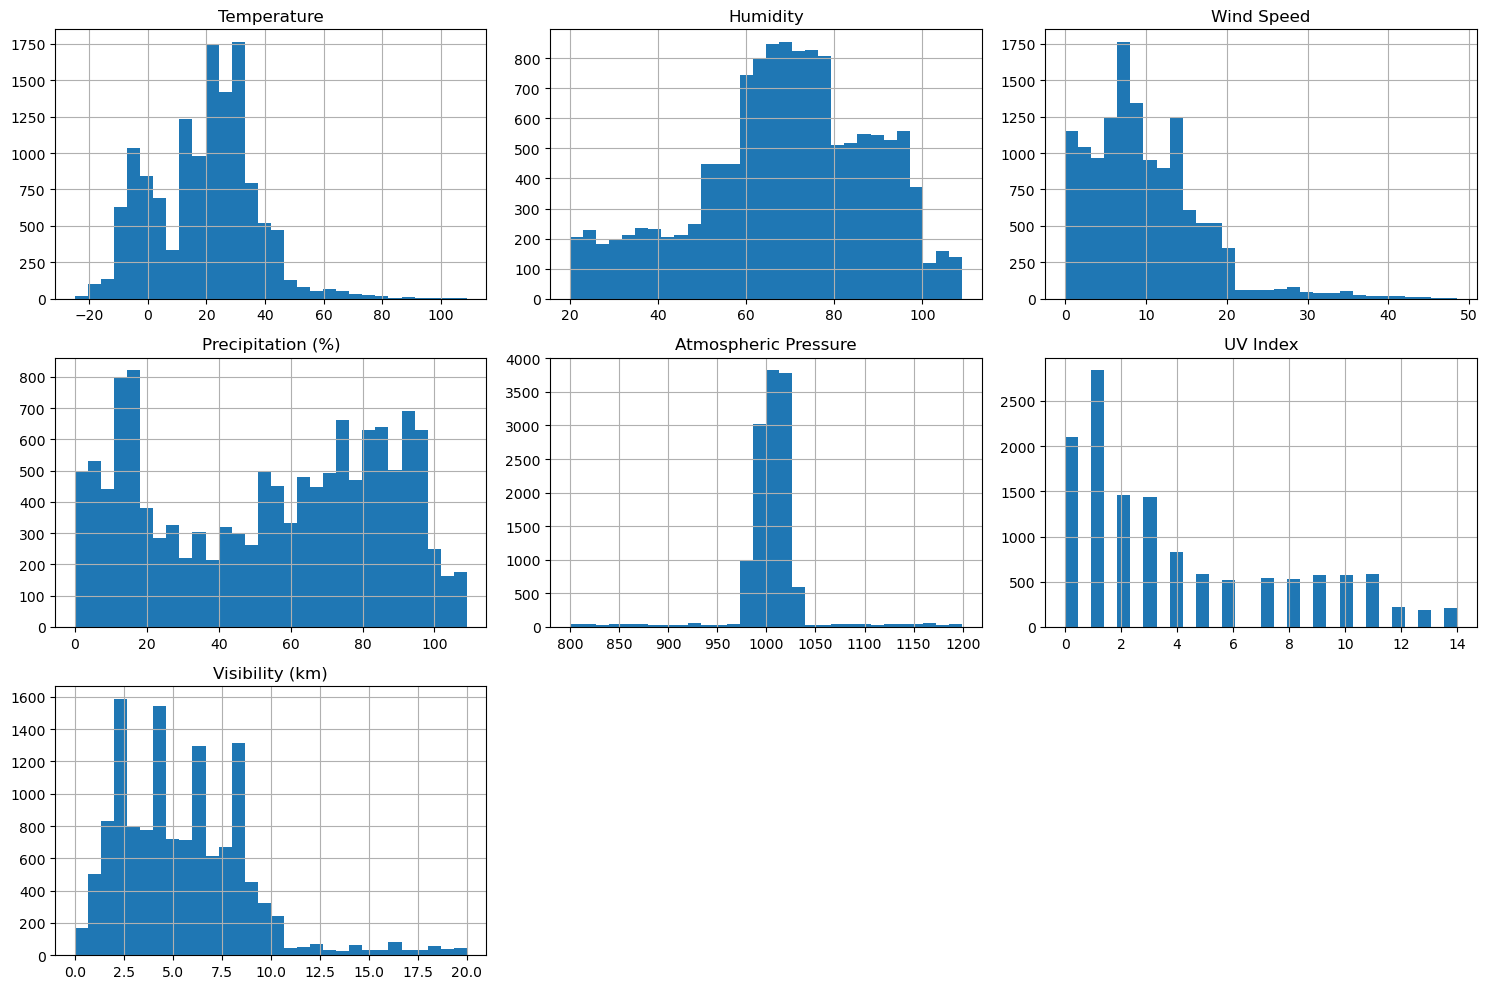

In [76]:
numeric_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


df[numeric_cols].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

1. Temperature: Outliers may include extreme highs or lows during heatwaves or cold snaps.

2. Humidity: Outliers could be very low (arid) or very high (tropical) values.

3. Wind Speed: Outliers are typically very high gusts from storms or hurricanes.

4. Precipitation (%): Outliers might be unusually high percentages during rare heavy rainfall.

5. Atmospheric Pressure: Outliers could be very low (storm systems) or very high (anticyclones).

6. UV Index: Outliers are often extremely high values in high-altitude or equatorial regions.

7. Visibility (km): Outliers may include very low values due to fog, dust, or pollution.

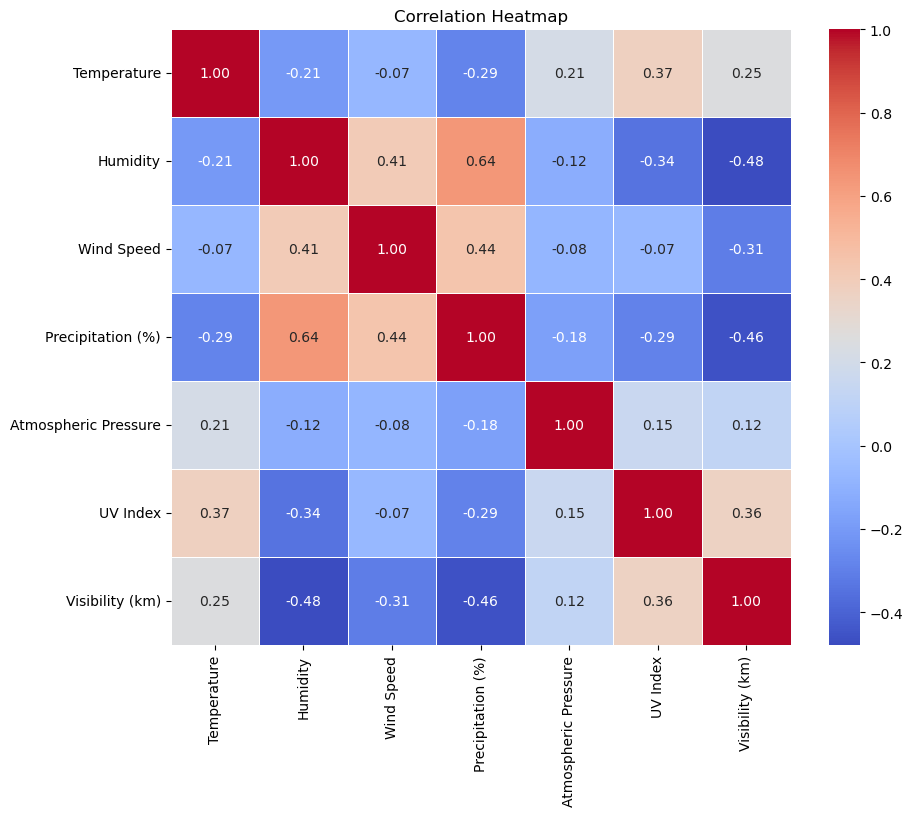

In [79]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [81]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

numeric_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 
                'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

categorical_cols = ['Cloud Cover', 'Season', 'Location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Weather_Label'] = le.fit_transform(df['Weather Type'])

In [85]:
from sklearn.model_selection import train_test_split

X = df.drop(['Weather Type', 'Weather_Label'], axis=1)
y = df['Weather_Label']

In [87]:
from sklearn.model_selection import train_test_split

# Split into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

print("Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Shapes:
X_train: (9240, 10)
X_test: (3960, 10)


In [89]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Pipeline: preprocessing + LR
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # RobustScaler + OneHotEncoder
    ('classifier', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ))
])

# Fit on full training set
lr_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate Macro-F1 on test set
macro_f1_lr = f1_score(y_test, y_pred_lr, average='macro')
print("LR Test Macro-F1:", macro_f1_lr)

LR Test Macro-F1: 0.8692624534285753


In [91]:
from catboost import CatBoostClassifier

# Build pipeline: preprocessing + CatBoost
cat_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # RobustScaler + OneHotEncoder
    ('classifier', CatBoostClassifier(
        iterations=500,
        learning_rate=0.1,
        depth=6,
        loss_function='MultiClass',
        eval_metric='TotalF1',
        random_seed=42,
        verbose=0
    ))
])

# Fit on full training set
cat_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_cat = cat_pipeline.predict(X_test)

# Evaluate Macro-F1
macro_f1_cat = f1_score(y_test, y_pred_cat, average='macro')
print("CatBoost Test Macro-F1:", macro_f1_cat)

CatBoost Test Macro-F1: 0.9146976500646813


In [93]:
import lightgbm as lgb

# Build pipeline: preprocessing + LightGBM
lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # RobustScaler + OneHotEncoder
    ('classifier', lgb.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.1,
        max_depth=6,
        objective='multiclass',
        random_state=42,
        n_jobs=-1,
        verbose=-1
    ))
])

# Fit on full training set
lgb_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_lgb = lgb_pipeline.predict(X_test)

# Evaluate Macro-F1
macro_f1_lgb = f1_score(y_test, y_pred_lgb, average='macro')
print("LightGBM Test Macro-F1:", macro_f1_lgb)

LightGBM Test Macro-F1: 0.9141051573022674


In [95]:
# Logistic Regression
y_train_pred_lr = lr_pipeline.predict(X_train)
train_macro_f1_lr = f1_score(y_train, y_train_pred_lr, average='macro')

# CatBoost
y_train_pred_cat = cat_pipeline.predict(X_train)
train_macro_f1_cat = f1_score(y_train, y_train_pred_cat, average='macro')

# LightGBM
y_train_pred_lgb = lgb_pipeline.predict(X_train)
train_macro_f1_lgb = f1_score(y_train, y_train_pred_lgb, average='macro')

results_train_test = {
    'Model': ['Logistic Regression', 'CatBoost', 'LightGBM'],
    'Train Macro-F1': [train_macro_f1_lr, train_macro_f1_cat, train_macro_f1_lgb],
    'Test Macro-F1': [macro_f1_lr, macro_f1_cat, macro_f1_lgb]
}

comparison_train_test_df = pd.DataFrame(results_train_test)
comparison_train_test_df = comparison_train_test_df.sort_values(by='Test Macro-F1', ascending=False).reset_index(drop=True)
comparison_train_test_df

,Model,Train Macro-F1,Test Macro-F1
0,CatBoost,0.991673,0.914698
1,LightGBM,1.000000,0.914105
2,Logistic Regression,0.871414,0.869262


In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

# Define pipeline
cat_pipeline_rs = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(
        loss_function='MultiClass',
        eval_metric='TotalF1',
        random_seed=42,
        verbose=0
    ))
])

# Hyperparameter grid (lightweight)
param_dist_cat = {
    'classifier__iterations': [400, 500, 600],
    'classifier__depth': [4, 5, 6],
    'classifier__learning_rate': [0.05, 0.1, 0.15]
}

# Macro-F1 scorer
macro_f1_scorer = make_scorer(f1_score, average='macro')

# RandomizedSearchCV
rs_cat = RandomizedSearchCV(
    cat_pipeline_rs,
    param_distributions=param_dist_cat,
    n_iter=5,             # only 5 random combinations (light)
    scoring=macro_f1_scorer,
    cv=3,                 # 3-fold CV
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit
rs_cat.fit(X_train, y_train)

# Best parameters & test score
print("CatBoost Best Params:", rs_cat.best_params_)
y_pred_cat_rs = rs_cat.predict(X_test)
macro_f1_cat_rs = f1_score(y_test, y_pred_cat_rs, average='macro')
print("CatBoost RandomizedSearchCV Test Macro-F1:", macro_f1_cat_rs)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
CatBoost Best Params: {'classifier__learning_rate': 0.1, 'classifier__iterations': 500, 'classifier__depth': 5}
CatBoost RandomizedSearchCV Test Macro-F1: 0.9137586702943372


In [99]:
# Predict on training set
y_train_pred_cat_rs = rs_cat.predict(X_train)
train_macro_f1_cat_rs = f1_score(y_train, y_train_pred_cat_rs, average='macro')

print("Tuned CatBoost Train Macro-F1:", train_macro_f1_cat_rs)
print("Tuned CatBoost Test Macro-F1:", macro_f1_cat_rs)

# Compute difference
diff = train_macro_f1_cat_rs - macro_f1_cat_rs
print("Train-Test Macro-F1 difference:", diff)

Tuned CatBoost Train Macro-F1: 0.982055101311811
Tuned CatBoost Test Macro-F1: 0.9137586702943372
Train-Test Macro-F1 difference: 0.06829643101747374


In [ ]:
# Define pipeline
lgb_pipeline_rs = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(
        objective='multiclass',
        random_state=42,
        n_jobs=-1
    ))
])

# Hyperparameter grid (lightweight)
param_dist_lgb = {
    'classifier__n_estimators': [400, 500, 600],
    'classifier__max_depth': [4, 5, 6],
    'classifier__learning_rate': [0.05, 0.1, 0.15]
}

# RandomizedSearchCV
rs_lgb = RandomizedSearchCV(
    lgb_pipeline_rs,
    param_distributions=param_dist_lgb,
    n_iter=5,             # only 5 random combinations
    scoring=macro_f1_scorer,
    cv=3,                 # 3-fold CV
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit
rs_lgb.fit(X_train, y_train)

# Best parameters & test score
print("LightGBM Best Params:", rs_lgb.best_params_)
y_pred_lgb_rs = rs_lgb.predict(X_test)
macro_f1_lgb_rs = f1_score(y_test, y_pred_lgb_rs, average='macro')
print("LightGBM RandomizedSearchCV Test Macro-F1:", macro_f1_lgb_rs)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [46]:
# Predict on training set
y_train_pred_lgb_rs = rs_lgb.predict(X_train)
train_macro_f1_lgb_rs = f1_score(y_train, y_train_pred_lgb_rs, average='macro')

print("Tuned LightGBM Train Macro-F1:", train_macro_f1_lgb_rs)
print("Tuned LightGBM Test Macro-F1:", macro_f1_lgb_rs)

# Compute difference
diff = train_macro_f1_lgb_rs - macro_f1_lgb_rs
print("Train-Test Macro-F1 difference:", diff)

Tuned LightGBM Train Macro-F1: 1.0
Tuned LightGBM Test Macro-F1: 0.9153451053767224
Train-Test Macro-F1 difference: 0.08465489462327758


In [48]:
import pandas as pd

# Prepare data
comparison_data = {
    'Model': [
        'Logistic Regression',
        'CatBoost (untuned)',
        'LightGBM (untuned)',
        'CatBoost (tuned)',
        'LightGBM (tuned)'
    ],
    'Train Macro-F1': [
        0.871414,        # LR
        0.991673,        # CatBoost untuned
        1.0,             # LightGBM untuned
        0.982055,        # CatBoost tuned
        1.0              # LightGBM tuned
    ],
    'Test Macro-F1': [
        0.869262,        # LR
        0.914698,        # CatBoost untuned
        0.914105,        # LightGBM untuned
        0.913759,        # CatBoost tuned
        0.915345         # LightGBM tuned
    ]
}

# Create DataFrame
df_comparison = pd.DataFrame(comparison_data)

# Calculate overfitting (Train - Test)
df_comparison['Overfitting (Train-Test)'] = df_comparison['Train Macro-F1'] - df_comparison['Test Macro-F1']

# Display
df_comparison

,Model,Train Macro-F1,Test Macro-F1,Overfitting (Train-Test)
0,Logistic Regression,0.871414,0.869262,0.002152
1,CatBoost (untuned),0.991673,0.914698,0.076975
2,LightGBM (untuned),1.000000,0.914105,0.085895
3,CatBoost (tuned),0.982055,0.913759,0.068296
4,LightGBM (tuned),1.000000,0.915345,0.084655


In [50]:
import joblib

joblib.dump(rs_cat.best_estimator_, 'catboost_weather_model.pkl')

['catboost_weather_model.pkl']

In [ ]:
joblib.dump(le, 'label_encoder.pkl')